# Lasso、リッジ回帰

In [56]:
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import preprocesses
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import numpy as np

In [57]:
#データの読み込み
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [58]:
new_train=train[preprocesses.train_valiable_list]
new_test=test[preprocesses.test_valiable_list]
new_train=preprocesses.preprocess(new_train)
new_test=preprocesses.preprocess(new_test)
new_train["SalePrice"]=np.log(new_train["SalePrice"])

/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t[k]= t[k].map(five_map1)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t["BsmtExposure"]= t["BsmtExposure"].map(five_map2)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [59]:
new_train.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice,Baths
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,61,0,0,0,0,0,0,2008,12.247694,4
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,2007,12.109011,3
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,42,0,0,0,0,0,0,2008,12.317167,4
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,35,272,0,0,0,0,0,2006,11.849398,2
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,84,0,0,0,0,0,0,2008,12.429216,4


In [60]:
#リッジ回帰
from sklearn.linear_model import Ridge
RMSE=[]
r2_scores=[]
alphas = 10**np.linspace(5, -5, 100)
for alpha in alphas:#parameter change
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', Ridge(alpha = alpha, normalize = True))])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, new_train.drop(["SalePrice"], axis=1), new_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))

In [62]:
print(RMSE)
print(min(RMSE))
print(alphas[RMSE.index(min(RMSE))])

[0.39951178319989755, 0.39950283163413997, 0.3994915367856483, 0.3994772854916477, 0.39945930429009474, 0.3994366175990383, 0.399407995036529, 0.3993718850915622, 0.3993263316579974, 0.39926886908071085, 0.39919639030439874, 0.3991049814264624, 0.398989714403354, 0.3988443878188179, 0.3986612034844342, 0.3984303642352757, 0.3981395756992002, 0.3977734322629878, 0.397312665324498, 0.39673323089788115, 0.3960052148809211, 0.39509153964228155, 0.39394646787429244, 0.39251392306021254, 0.3907256862778984, 0.3884995940642511, 0.3857379606891586, 0.38232658896507643, 0.37813492045491515, 0.3730180994842904, 0.3668219501512306, 0.35939201160486745, 0.3505877033720951, 0.3403021984121731, 0.32848745141920793, 0.31518195517823033, 0.3005363756931193, 0.284829946861085, 0.2684695954473151, 0.25196553487689877, 0.23588213478112133, 0.22077037060217422, 0.20709557159472752, 0.1951781830773626, 0.1851631705103341, 0.17702515704761426, 0.1706044845652145, 0.16565983944734033, 0.1619206505866745, 0.1

In [63]:
print(r2_scores)

[-0.003296325897458563, -0.003251295661334663, -0.0031944791478520475, -0.0031227931178253064, -0.003032348786943073, -0.002918241966360813, -0.0027742888875368576, -0.0025926938646662957, -0.0023636315439136578, -0.002074722323170164, -0.00171037447575495, -0.0012509604641792516, -0.0006717878126142995, 5.818326682036634e-05, 0.000977932345907684, 0.0021363476399121504, 0.003594646379561062, 0.005429328225547004, 0.007735744084107576, 0.010632352760996966, 0.014265709047971687, 0.018816166644457934, 0.02450416967056024, 0.031596822419500216, 0.04041413643476548, 0.05133392094694713, 0.06479367651315975, 0.08128706838166208, 0.10135165836995838, 0.1255437552423106, 0.15439591006262382, 0.18835342132810365, 0.22768915757991248, 0.27240194713329846, 0.3221128886121788, 0.37598455600180763, 0.43269582637943504, 0.49050328970410184, 0.547403152925413, 0.6013759051187282, 0.6506609567068764, 0.6939886152158553, 0.7307065128934759, 0.7607749487254255, 0.7846513378443997, 0.8031148930518077, 

Text(0, 0.5, 'RMSE')

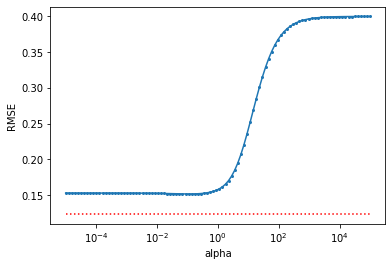

In [68]:
plt.plot(alphas,RMSE,"o-",markersize=2)
plt.xscale("log")
plt.hlines([0.12381220676923944], alphas[-1],alphas[0], "red", linestyles='dotted')
plt.xlabel("alpha")
plt.ylabel("RMSE")

alpha=0.10974987654930568の時が最小、RMSEは0.1519345482138406



In [69]:
#パラメータを見てみる
model = Ridge(alpha =0.10974987654930568, normalize = True)
model.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
model.coef_

array([ 3.27980143e-04,  1.96452485e-06,  5.62695386e-02,  3.34173618e-02,
        1.20863530e-03,  8.39405307e-04,  1.47939834e-05,  3.68131667e-02,
       -6.88515382e-03,  2.52560257e-02, -8.10305196e-03,  1.13691122e-02,
        6.39860888e-03, -1.22951124e-05, -4.83578508e-02,  5.09983502e-05,
        1.80853437e-02,  6.07341639e-02,  1.01643715e-04,  4.15358538e-05,
        7.58917981e-06,  8.37416620e-05,  1.34922180e-02, -4.12082239e-02,
        1.58901556e-02,  3.24358472e-02,  1.96181149e-02,  1.21098698e-02,
        7.82491887e-06,  1.29176030e-02,  4.35172132e-02,  7.48787954e-05,
        8.26397296e-03,  1.18216783e-03,  2.05670319e-02,  9.22166453e-05,
        1.57130592e-05,  1.02370764e-04,  1.84827475e-04,  2.77631011e-04,
        1.02977709e-04, -6.90167004e-02,  4.51070534e-08, -5.21927242e-03,
        3.12552089e-02])

In [78]:
#Lasso回帰
from sklearn.linear_model import Ridge
RMSE=[]
r2_scores=[]
alphas = 10**np.linspace(5, -10, 100)
for alpha in alphas:#parameter change
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear',Lasso(alpha=alpha,normalize=True) )])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, new_train.drop(["SalePrice"], axis=1), new_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))

In [79]:
print(min(RMSE))
print(alphas[RMSE.index(min(RMSE))])

0.1526838281495669
5.72236765935022e-05


Text(0, 0.5, 'RMSE')

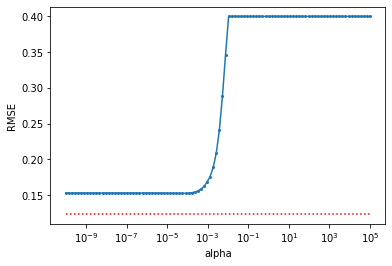

In [80]:
plt.plot(alphas,RMSE,"o-",markersize=2)
plt.xscale("log")
plt.hlines([0.12381220676923944], alphas[-1],alphas[0], "red", linestyles='dotted')
plt.xlabel("alpha")
plt.ylabel("RMSE")

もっともMSEが良かったのはalpha=5.72236765935022e-05,RMSE=0.1526838281495669<BR>
パラメータを見てみるといくつかのパラメータが0になっている。

In [82]:
model = Lasso(alpha =5.72236765935022e-05, normalize = True)
model.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
model.coef_

array([ 2.31168434e-04,  2.09897205e-06,  7.00785925e-02,  3.77355201e-02,
        1.61052387e-03,  5.25367315e-04,  0.00000000e+00,  2.50174414e-02,
       -5.74986380e-04,  2.00768802e-02, -0.00000000e+00,  9.38135935e-03,
        5.04270710e-03, -0.00000000e+00, -4.67042092e-02,  3.08029867e-05,
        1.75368956e-02,  5.35006211e-02,  8.03345037e-05,  0.00000000e+00,
       -0.00000000e+00,  1.41354444e-04,  9.16520933e-03, -3.59088714e-02,
        1.30367602e-02,  2.77998289e-02,  9.02965249e-03,  1.35659235e-02,
       -0.00000000e+00,  8.70077987e-03,  5.64512939e-02,  3.08353664e-05,
        5.17464527e-03,  0.00000000e+00,  1.55921300e-02,  7.88325290e-05,
        0.00000000e+00,  7.89177457e-05,  1.15112914e-04,  2.69329074e-04,
        0.00000000e+00, -5.52964238e-02,  0.00000000e+00, -3.52315884e-03,
        2.90283518e-02])

In [88]:
new_train.drop(["SalePrice"],axis=1).columns[model.coef_==0] #10個が0になっている。

Index(['MasVnrArea', 'BsmtCond', 'BsmtFinSF1', '2ndFlrSF', 'LowQualFinSF',
       'GarageYrBlt', 'GarageCond', 'OpenPorchSF', 'PoolArea', 'MiscVal'],
      dtype='object')

## 結果を提出してみる

In [90]:
#Ridge
model = Ridge(alpha =0.10974987654930568, normalize = True)
model.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
# make predictions
yt =model.predict(new_test)
output_df=new_test.copy()
output_df["SalePrice"] = np.exp(yt)#値段に戻す
output_df["Id"]=test["Id"]
output_df.to_csv("output.csv",index=False, columns=['Id','SalePrice'])
!head output.csv

Id,SalePrice
1461,117466.24084019409
1462,146436.9602968318
1463,171530.85180750067
1464,197342.68327899402
1465,184926.48537411902
1466,166585.77131853128
1467,180052.19892215478
1468,162541.3350132945
1469,184400.77837434973


In [91]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f output.csv -m  "Ridge" 

100%|██████████████████████████████████████| 33.6k/33.6k [00:02<00:00, 11.6kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques

In [92]:
#Lasso
model = Lasso(alpha =5.72236765935022e-05, normalize = True)
model.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
# make predictions
yt =model.predict(new_test)
output_df=new_test.copy()
output_df["SalePrice"] = np.exp(yt)#値段に戻す
output_df["Id"]=test["Id"]
output_df.to_csv("output.csv",index=False, columns=['Id','SalePrice'])
!head output.csv

Id,SalePrice
1461,116220.53377942857
1462,148203.24137962513
1463,169985.2831212608
1464,197933.87214374795
1465,190012.84862334531
1466,166860.74087548952
1467,182974.66432910858
1468,163523.6572085215
1469,186912.41262638732


In [93]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f output.csv -m  "Lasso" 

100%|██████████████████████████████████████| 33.7k/33.7k [00:05<00:00, 6.13kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques

Ridge回帰では0.14492、Lassoでは0.14303であった。これはLinearRegressionのスコア0.14590よりも良かった。